## Шаг 1. Загрузка исходных данных из файла

In [211]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decomposea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import pandas as pd
import numpy as np
# import optuna
import torch

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from torchmetrics import MeanSquaredError
# from catboost import CatBoostRegressor
# from math import ceil

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from math import ceil
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split

In [178]:
# Читаем файл csv

data = pd.read_csv(
    '/Users/danil/Desktop/Courses/Яндекс Практикум Data Science/13/[SW.BAND] [Яндекс.Практикум] Специалист по Data Science Плюс. Часть 13 - 16 (2022)/[SW.BAND] Модели и алгоритмы в машинном обучении/[SW.BAND] 07 Самостоятельный проект/6_class.csv',
)

## Шаг 2. Исследовательский анализ

In [179]:
# Изучим данные

print('\n' + '\033[1m' + 'Данные в таблице' + '\033[0m')
display(data.head())

print('\n' + '\n' + '\033[1m' + 'Разброс данных' + '\033[0m' + '\n')
display(data.describe())

print('\n' + '\n' + '\033[1m' + 'Информация о таблице' + '\033[0m' + '\n')
display(data.info())

print('\n' + '\n' + '\033[1m' + 'Колличество пропусков' + '\033[0m' + '\n')
display(data.isna().sum())

print(
    '\n' + 
    '\n' +
    '\033[1m' + 'Колличество дубликатов:' + '\033[0m', data.duplicated().sum(), 
    '\n'
)

print('\n' + '\n' + '\033[1m' + 'Колличество уникальных значений' + '\033[0m' + '\n')
display(data.nunique())


Данные в таблице


,Unnamed: 0.1,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,4,1939,0.000138,0.1030,20.06,0,Red




Разброс данных



,Unnamed: 0.1,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.00000,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,119.50000,119.50000,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,69.42622,69.42622,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,0.00000,0.00000,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,59.75000,59.75000,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,119.50000,119.50000,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,179.25000,179.25000,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,239.00000,239.00000,40000.000000,849420.000000,1948.500000,20.060000,5.000000




Информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            240 non-null    int64  
 1   Unnamed: 0              240 non-null    int64  
 2   Temperature (K)         240 non-null    int64  
 3   Luminosity(L/Lo)        240 non-null    float64
 4   Radius(R/Ro)            240 non-null    float64
 5   Absolute magnitude(Mv)  240 non-null    float64
 6   Star type               240 non-null    int64  
 7   Star color              240 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 15.1+ KB


None



Колличество пропусков



Unnamed: 0.1              0
Unnamed: 0                0
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
dtype: int64



Колличество дубликатов: 0 



Колличество уникальных значений



Unnamed: 0.1              240
Unnamed: 0                240
Temperature (K)           228
Luminosity(L/Lo)          208
Radius(R/Ro)              216
Absolute magnitude(Mv)    228
Star type                   6
Star color                 19
dtype: int64

In [185]:
# Удалим первые 2 колонки, так как они дублируют индекс

data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True) 

In [249]:
# Поменяем название колонок, чтобы было проще их вызывать

data.columns = ['temperature', 'luminosity', 'radius', 'absolute_magnitude', 'star_type', 'star_color']

In [250]:
# Посмотрим как распределены типы звезд

data['star_type'].value_counts()

star_type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [251]:
# Посмотрим как распределены цвета звезд

data['star_color'].value_counts()

star_color
red                   112
blue                   56
blue white             41
white                  12
yellow-white           12
yellow                  3
orange                  2
pale yellow orange      1
orange-red              1
Name: count, dtype: int64

In [252]:
# Приведем все название цветов к нижнему регистру
# и удалим пробелы спереди

data['star_color'] = data['star_color'].str.lower()
data['star_color'] = data['star_color'].str.strip()

In [254]:
# Уберем синонимы

data['star_color'] = data['star_color'].replace('blue-white', 'blue white')
data['star_color'] = data['star_color'].replace('white-yellow', 'yellow-white')
data['star_color'] = data['star_color'].replace('yellowish white', 'yellow-white')
data['star_color'] = data['star_color'].replace('yellowish', 'yellow')
data['star_color'] = data['star_color'].replace('whitish', 'white')

Изучим признаки

temperature


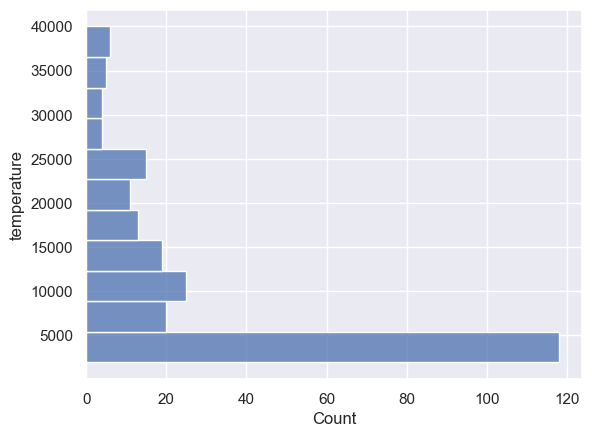

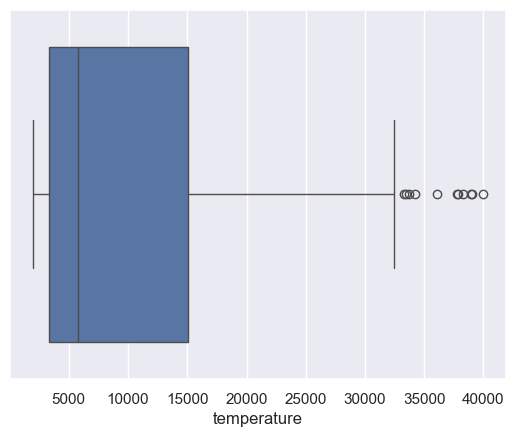


luminosity


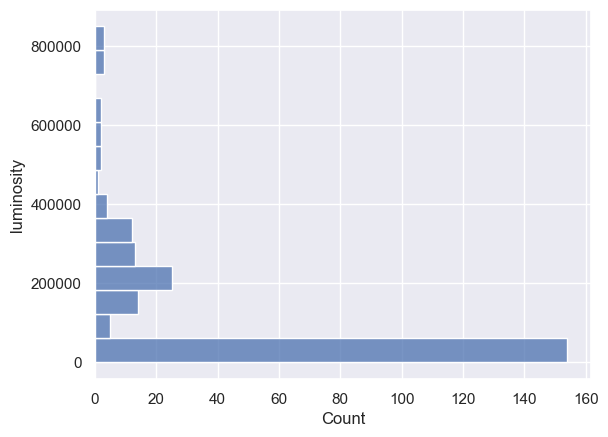

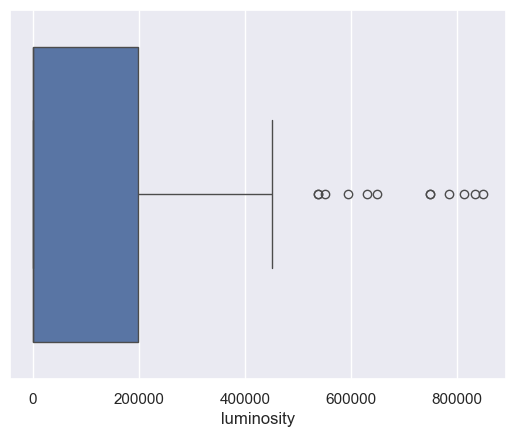


radius


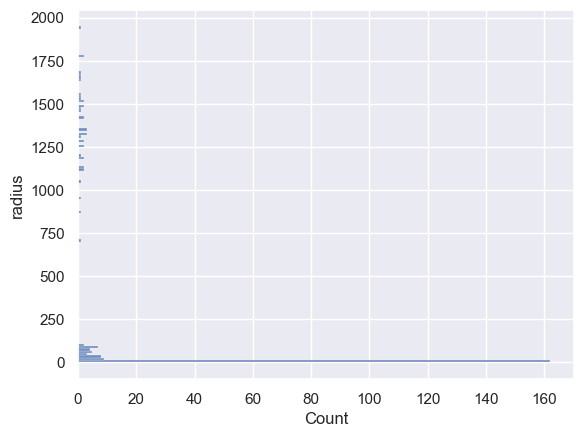

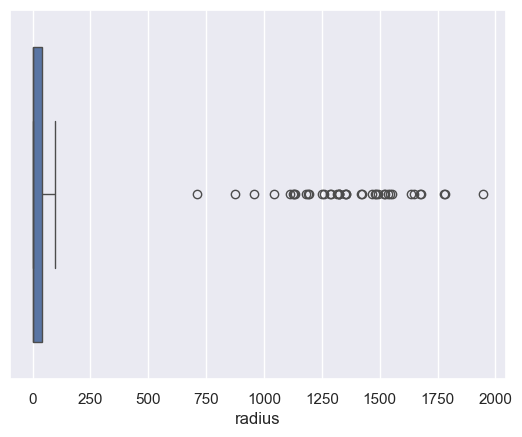


absolute_magnitude


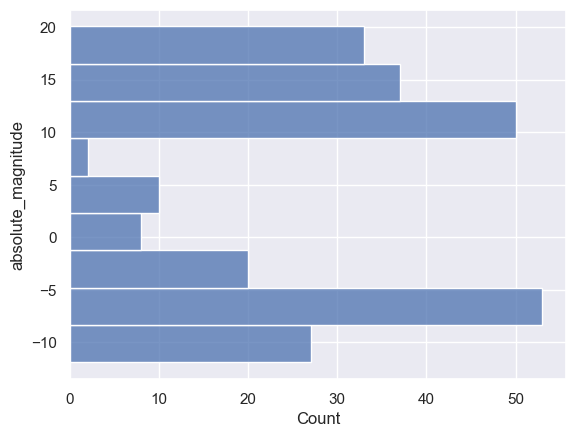

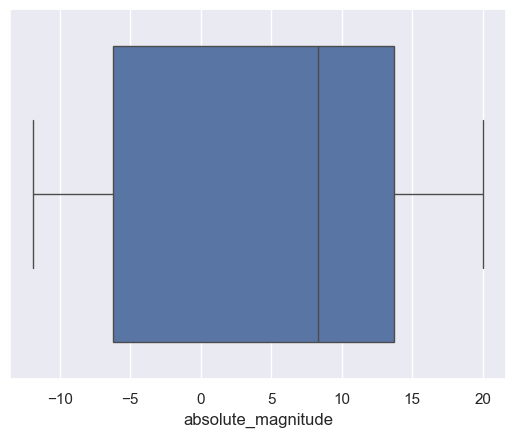

In [255]:
# Построим граффики количественных данных

column_names = ['temperature', 'luminosity', 'radius', 'absolute_magnitude']

for i in column_names:

    print('\033[1m' + i + '\033[1m')
    sns.histplot(data=data, y=i)
    plt.show()
    sns.boxplot(x=data[i])
    plt.show()
    print()

<Axes: title={'center': 'Star type'}, xlabel='Сlasses', ylabel='Count'>

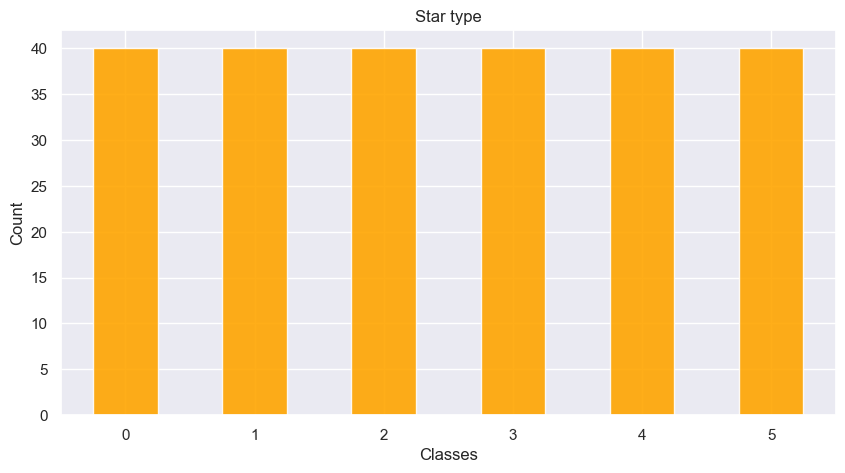

In [256]:
# Построим граффик категориальных данных – тип звезды

data['star_type'].value_counts().plot(kind='bar', title='Star type', xlabel='Сlasses', 
                                     ylabel='Count', rot=1, color='orange', alpha =0.9, figsize=(10,5))

<Axes: title={'center': 'Star color'}, xlabel='colors', ylabel='Count'>

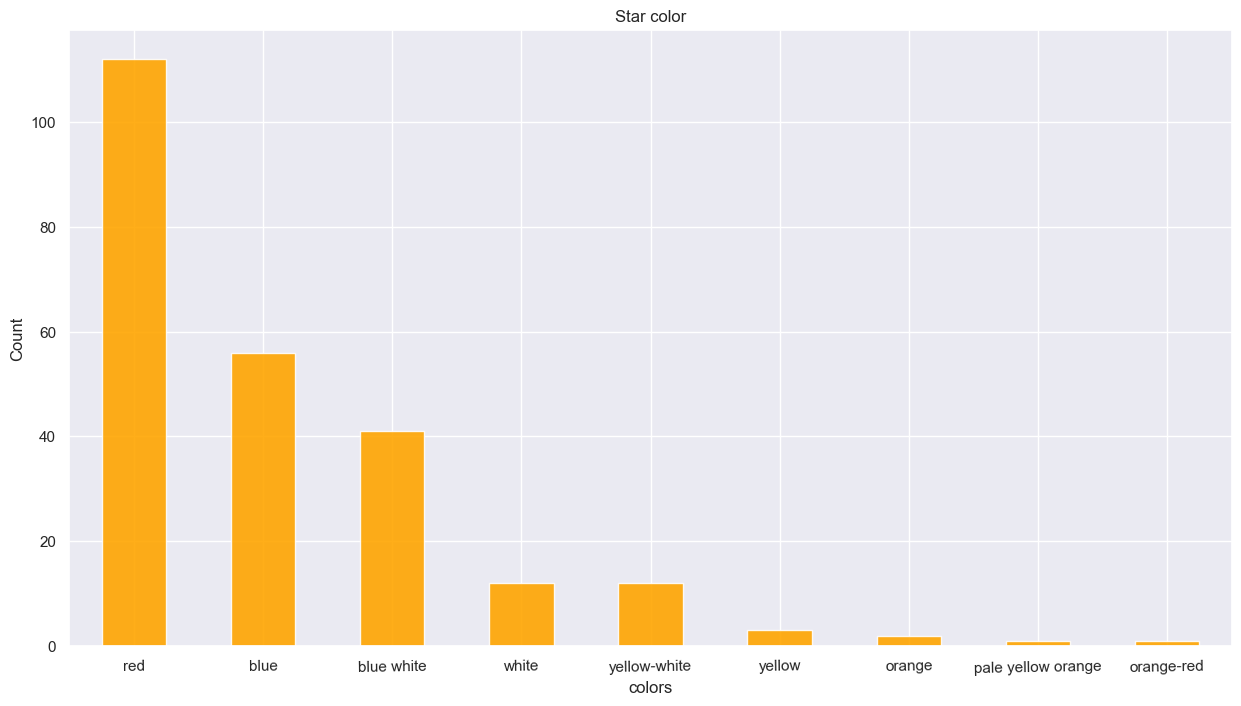

In [247]:
# Построим граффик категориальных данных – цвет звезды (топ 10)

data['star_color'].value_counts().plot(kind='bar', title='star_color', xlabel='colors', 
                                     ylabel='Count', rot=1, color='orange', alpha =0.9, figsize=(15,8))    

### Вывод исследовательского анализа

1. Большинство планет имеет температуру ниже 5000 градусов.
2. Светимость звезд относительно Солнца у подавляющего колличества планет ниже 50000 люменов, и 75% планет имеют светимость ниже 200000 люменов.
3. Больше половины звезд имею радиус меньше чем у Солнца.
4. Абсолютная звёздная величина характеризующая блеск звезды имеет более равномерное распределение показателей среди планет. Лидером стал показатель -5.
5. Все звезды разбиты на 5 категорий ровно по 40 штук.
6. Подавляющее колличество планет – красного цвета.

## Шаг 3. Подготовка данных к построению модели

In [467]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

Если не собрать малочисленные цвета в одну группу, получится слишком много категориальных признаков

In [292]:
# Собирам малочисленные цвета в одну группу

star_colors = ['pale yellow orange', 'orange', 'yellow', 'orange-red', 'white', 'yellow-white']

for i in star_colors:
    data['star_color'] = data['star_color'].replace(i, 'other')

In [444]:
# Применяем One-hot-encoding к категориальным признакам: цвет звезды и тип звезды

data_ohe = pd.get_dummies(data, columns=['star_type', 'star_color'], drop_first=True)
data_ohe = data_ohe.astype('float64')
data_ohe

,temperature,luminosity,radius,absolute_magnitude,star_type_1,star_type_2,star_type_3,star_type_4,star_type_5,star_color_blue white,star_color_other,star_color_red
0,3068.0,0.002400,0.1700,16.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3042.0,0.000500,0.1542,16.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2600.0,0.000300,0.1020,18.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2800.0,0.000200,0.1600,16.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1939.0,0.000138,0.1030,20.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940.0,374830.000000,1356.0000,-9.93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
236,30839.0,834042.000000,1194.0000,-10.63,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
237,8829.0,537493.000000,1423.0000,-10.73,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
238,9235.0,404940.000000,1112.0000,-11.23,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [445]:
# Масштабируем численные признаки

columns = ['luminosity', 'radius', 'absolute_magnitude']
scaler = StandardScaler()
scaler.fit(data_ohe[columns])
data_ohe[columns] = scaler.transform(data_ohe[columns])

In [471]:
# Делим данные на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(
    data_ohe.drop(columns=['temperature']),
    data_ohe['temperature'],
    test_size=0.2,
    random_state=67
    # , shuffle=True
)

In [472]:
# Переводим данные в тензор

X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

## Шаг 4. Построение простой модели нейронной сети — baseline

In [562]:
num_epochs = 1000
loss = nn.MSELoss()
rmse = MeanSquaredError(squared = False)

net = nn.Sequential(
            nn.Linear(11, 800),
            nn.Tanh(),
            nn.Linear(800, 500),
            nn.ReLU(),   
            nn.Linear(500, 1)
            )
        
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
        
        
for epoch in range(num_epochs):
    optimizer.zero_grad()

    preds = net.forward(X_train).flatten()

    loss_value = loss(preds, y_train)

    loss_value.backward()

    optimizer.step()

net.eval()
predictions = net.forward(X_test).flatten()
rmse_result = round(rmse(net.forward(X_test).flatten(), y_test).item(), 2)
print('RMSE:', rmse_result)

RMSE: 2939.18


In [563]:
test_preds = pd.DataFrame(predictions.detach().numpy(), columns=['temperature'])
test_target = pd.DataFrame(y_test.detach().numpy(), columns=['temperature'])

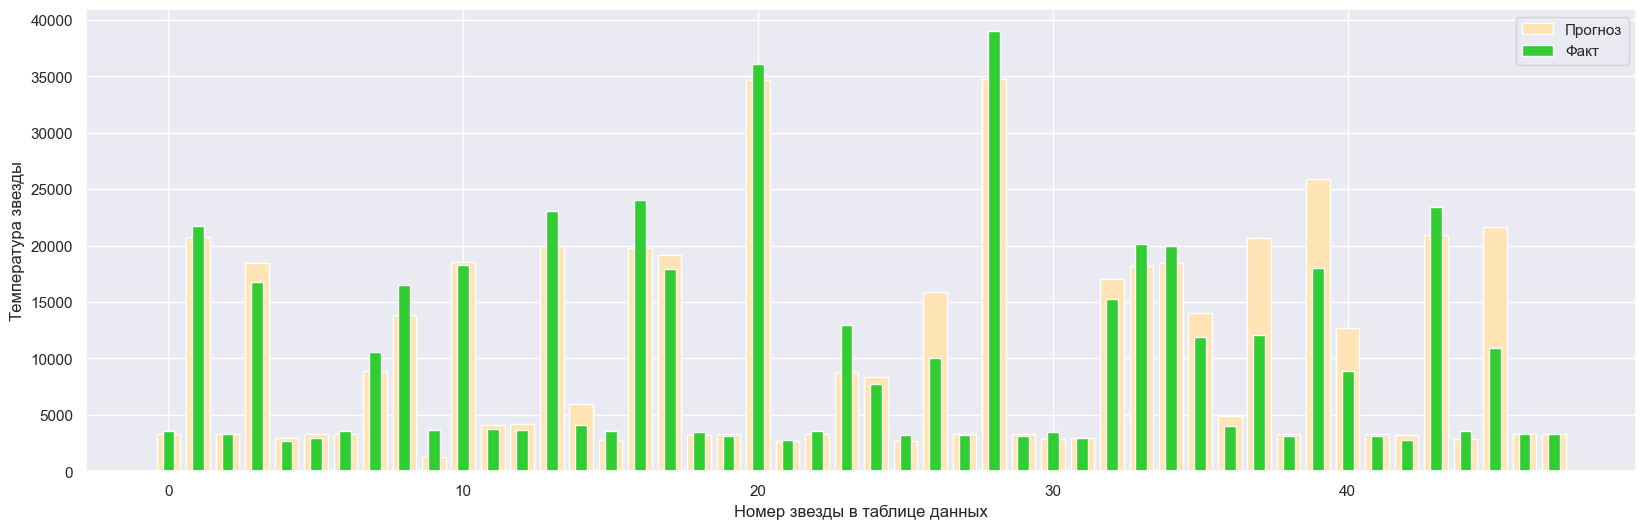

In [565]:
fig, ax = plt.subplots(figsize=[20,6])
plt.bar(x=test_preds.index, height=test_preds['temperature'], color='moccasin' , label='Прогноз')
plt.bar(x=test_target.index, height=test_target['temperature'], color='limegreen', label='Факт', width= 0.4)
plt.xlabel('Номер звезды в таблице данных')
plt.ylabel('Температура звезды')
ax.legend()
plt.show()

### Вывод исследовательского анализа

Нам сразу удалось показать хорошие результаты особенно среди тех планет, которых больше всего в таблице данных

## Шаг 5. Улучшение сети

In [501]:
# Делаем списки колличества нейронов 
# для 2 скрытых слоев, чтобы затем их перебрать

number_of_neurons_1 = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
number_of_neurons_2 = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_in_neurons = X_train.shape[1]
n_out_neurons = 1

In [502]:
# Создаем переменные лучших показателей,
# чтобы затем добавить в них результаты перебора

best_n_hidden_neurons_1 = 0
best_n_hidden_neurons_2 = 0
best_rmse = 0

In [503]:
# Создаем первую нейронную сеть, чтобы перебрать в ней разное сочетание количество нейронов 

num_epochs = 1000
loss = nn.MSELoss()
rmse = MeanSquaredError(squared = False)

for hidden_neurons_1 in number_of_neurons_1:
    for hidden_neurons_2 in number_of_neurons_2:  
        net = nn.Sequential(
            nn.Linear(n_in_neurons, hidden_neurons_1),
            nn.Tanh(),
            nn.Linear(hidden_neurons_1, hidden_neurons_2),
            nn.ReLU(),   
            nn.Linear(hidden_neurons_2, n_out_neurons)
            )
        
        optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
        
        
        for epoch in range(num_epochs):
            optimizer.zero_grad()
        
            preds = net.forward(X_train).flatten()
        
            loss_value = loss(preds, y_train)
        
            loss_value.backward()
        
            optimizer.step()
        
        net.eval()
        rmse_result = round(rmse(net.forward(X_test).flatten(), y_test).item(), 2)
        
        if best_rmse == 0 or rmse_result < best_rmse:
            best_rmse = rmse_result
            best_n_hidden_neurons_1 = hidden_neurons_1
            best_n_hidden_neurons_2 = hidden_neurons_2
            print('Best RMSE:', best_rmse)
            print('Number of hidden neurons 1:', best_n_hidden_neurons_1)
            print('Number of hidden neurons 2:', best_n_hidden_neurons_2)
            print()

Best RMSE: 7713.63
Number of hidden neurons 1: 100
Number of hidden neurons 2: 100

Best RMSE: 5991.07
Number of hidden neurons 1: 100
Number of hidden neurons 2: 200

Best RMSE: 5483.47
Number of hidden neurons 1: 100
Number of hidden neurons 2: 300

Best RMSE: 5097.2
Number of hidden neurons 1: 100
Number of hidden neurons 2: 400

Best RMSE: 4800.39
Number of hidden neurons 1: 100
Number of hidden neurons 2: 500

Best RMSE: 4559.93
Number of hidden neurons 1: 100
Number of hidden neurons 2: 600

Best RMSE: 4353.69
Number of hidden neurons 1: 100
Number of hidden neurons 2: 700

Best RMSE: 4263.32
Number of hidden neurons 1: 100
Number of hidden neurons 2: 800

Best RMSE: 4090.97
Number of hidden neurons 1: 100
Number of hidden neurons 2: 900

Best RMSE: 3954.52
Number of hidden neurons 1: 100
Number of hidden neurons 2: 1000

Best RMSE: 3902.88
Number of hidden neurons 1: 200
Number of hidden neurons 2: 600

Best RMSE: 3806.39
Number of hidden neurons 1: 200
Number of hidden neurons 

Самый лучший результат дал первый скрытый слой с 1000-ю нейронами в сочетании с вторым с 400-а.

Теперь добавим в сеть инициализацию весом

In [513]:
# Создаем класс нейронной сети
# Добавляем нормализацию весов

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, best_n_hidden_neurons_1)
        self.act1 = nn.Tanh()
        self.fc2 = nn.Linear(best_n_hidden_neurons_1, best_n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(best_n_hidden_neurons_2, n_out_neurons)
        nn.init.uniform_(self.fc1.weight, a=-2, b=2)
        nn.init.uniform_(self.fc1.bias, a=-2, b=2)
        nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.normal_(self.fc2.bias, mean=0.5, std=0.7)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.normal_(self.fc3.bias, mean=0.5, std=0.7)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

net = Net()

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
        
        
for epoch in range(num_epochs):
    optimizer.zero_grad()

    preds = net.forward(X_train).flatten()

    loss_value = loss(preds, y_train)

    loss_value.backward()

    optimizer.step()

net.eval()
rmse_result = round(rmse(net.forward(X_test).flatten(), y_test).item(), 2)
print('RMSE:', rmse_result)

RMSE: 3057.04


Инициализация весов ухудшла результат, так что откажемся от нее

Попробуем теперь добавить BatchNorm

In [517]:
# Меняем класс нейронной сети
# Добавляем батчнормализацию

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(n_in_neurons, best_n_hidden_neurons_1)
        self.bn1 = nn.BatchNorm1d(best_n_hidden_neurons_1)
        self.layer2 = nn.Linear(best_n_hidden_neurons_1, best_n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(best_n_hidden_neurons_2)
        self.layer3 = nn.Linear(best_n_hidden_neurons_2, n_out_neurons)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = torch.tanh(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.layer3(x)
        return x 

net = Net()

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
        
        
for epoch in range(num_epochs):
    optimizer.zero_grad()

    preds = net.forward(X_train).flatten()

    loss_value = loss(preds, y_train)

    loss_value.backward()

    optimizer.step()

net.eval()
rmse_result = round(rmse(net.forward(X_test).flatten(), y_test).item(), 2)
print('RMSE:', rmse_result)

RMSE: 12013.38


BatchNorm в 4 раза ухудшил результат. Отказываемся от него.

Пробуем применить Dropout

In [521]:
# Меняем класс нейронной сети
# Добавляем дропаут

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(n_in_neurons, best_n_hidden_neurons_1)
        self.dp1 = nn.Dropout(p=0.2)
        self.layer2 = nn.Linear(best_n_hidden_neurons_1, best_n_hidden_neurons_2)
        self.dp2 = nn.Dropout(p=0.5)
        self.layer3 = nn.Linear(best_n_hidden_neurons_2, n_out_neurons)
        
    def forward(self, x):
        x = self.layer1(x)
        x = torch.tanh(x)
        x = self.dp1(x)
        x = self.layer2(x)
        x = torch.relu(x)
        x = self.dp2(x)
        x = self.layer3(x)
        return x 

net = Net()

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
        
        
for epoch in range(num_epochs):
    optimizer.zero_grad()

    preds = net.forward(X_train).flatten()

    loss_value = loss(preds, y_train)

    loss_value.backward()

    optimizer.step()

net.eval()
rmse_result = round(rmse(net.forward(X_test).flatten(), y_test).item(), 2)
print('RMSE:', rmse_result)

RMSE: 3156.35


Dropout тоже ухудшил результат. Не будем использовать.

Остается выбрать оптимальное количество эпох.

In [546]:
# Выбираем лучшее количество эпох 

results = np.array([])

net = nn.Sequential(
    nn.Linear(n_in_neurons, best_n_hidden_neurons_1),
    nn.Tanh(),
    nn.Linear(best_n_hidden_neurons_1, best_n_hidden_neurons_2),
    nn.ReLU(),   
    nn.Linear(best_n_hidden_neurons_2, n_out_neurons)
    )

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    
for epoch in range(1, 5001):
    optimizer.zero_grad()

    preds = net.forward(X_train).flatten()

    loss_value = loss(preds, y_train)

    loss_value.backward()

    optimizer.step()

    if epoch % 10 == 0:
        net.eval()
        rmse_result = round(rmse(net.forward(X_test).flatten(), y_test).item(), 2)
        results = np.append(results, rmse_result)

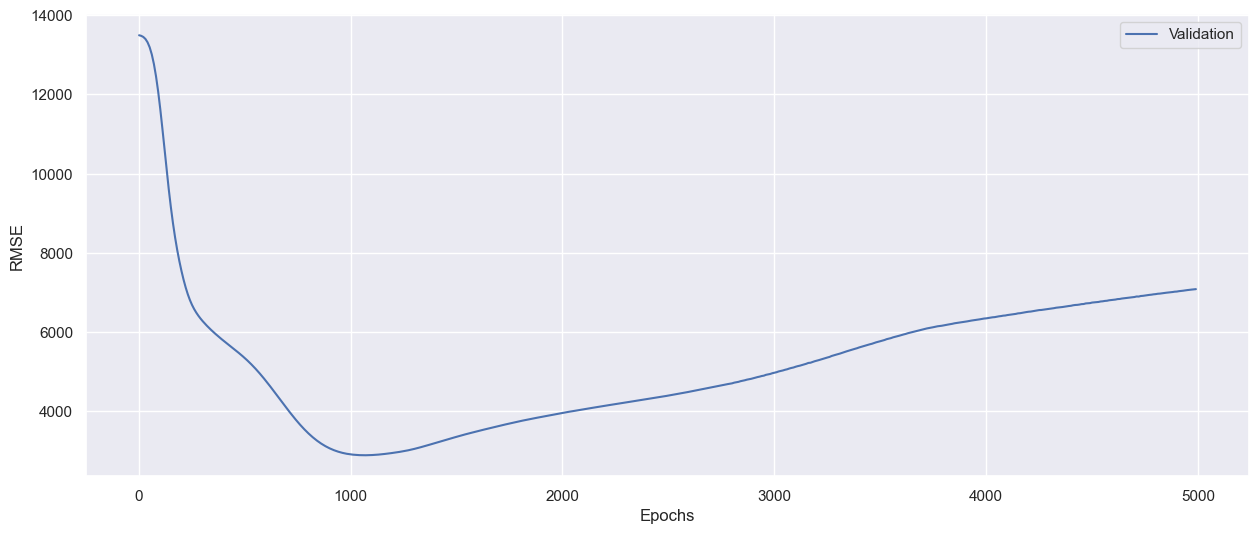

In [551]:
epochs = np.arange(1, 5001, 10)

plt.figure(figsize=[15,6])
sns.lineplot(x=epochs, y=results, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

Из графика видно, что сеть лучше всего себя показывает на 1000-е эпох, которые мы изначально выбрали как стандарт для экспериментов. 

### Вывод улучшения сети

1. Самых лучших результатов получилось добиться с 2-я скрытыми слоями, с 1000-ю нейронов в первом, и 400-а нейронами в втором
2. Лучшее количество эпох – 1000
3. Инициализация весов, батчнормализация и дропаут – только ухудшили результат

|  | NN | NN + Weights Initialization | NN + BatchNorm | NN + Dropout |
| --- | --- | --- | --- | --- |
| RMSE | 2916.24 | 3057.04 | 12013.38 | 3156.35 |

## Шаг 6. Выводы по проекту

* #### Лучший результат (RMSE: 2916.24) показала модель из 2-х скрытых слоев: 1000 нейронов в первом и 400 во втором.
* #### Лучшие функции активации: тангенс после первого скрытого слоя; релу после второго. 
* #### Лучшее количество эпох: 1000.
* #### Инициализация весов, батчнормализация и дропаут – только ухудшили результат, поэтому их не стоит использовать.